In [1]:
import pandas as pd

In [2]:
customer_journey_df = pd.read_excel("customer_journey.xlsx")
customer_journey_df.shape

(4011, 7)

In [3]:
customer_journey_df.dtypes

JourneyID              int64
CustomerID             int64
ProductId              int64
VisitDate     datetime64[ns]
Stage                 object
Action                object
Duration             float64
dtype: object

In [4]:
customer_journey_df.duplicated().sum()

71

In [5]:
customer_journey_df[customer_journey_df.duplicated()].sort_values(by="JourneyID")

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration
3993,23,58,1,2023-07-05,Homepage,View,48.0
3939,203,44,11,2024-12-28,Homepage,View,230.0
3940,404,30,13,2023-04-22,Homepage,View,112.0
3979,443,98,5,2023-09-04,Checkout,Drop-off,NaN
3995,494,29,6,2024-10-27,Checkout,Drop-off,NaN
...,...,...,...,...,...,...,...
3967,3781,54,8,2025-04-14,Homepage,View,250.0
3983,3852,99,5,2025-09-07,ProductPage,View,205.0
3941,3881,58,18,2024-08-27,Checkout,Drop-off,NaN
3938,3912,99,9,2025-06-13,Homepage,Click,143.0


In [6]:
customer_journey_df.drop_duplicates(keep="first" , inplace=True)

In [7]:
customer_journey_df.isna().sum()

JourneyID       0
CustomerID      0
ProductId       0
VisitDate       0
Stage           0
Action          0
Duration      599
dtype: int64

In [8]:
# Convert VisitDate to datetime and Duration to numeric
customer_journey_df['VisitDate'] = pd.to_datetime(customer_journey_df['VisitDate'], errors='coerce')
customer_journey_df['Duration'] = pd.to_numeric(customer_journey_df['Duration'], errors='coerce')

In [9]:
customer_journey_df

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,NaN
1,2,94,11,2025-07-09,Checkout,Drop-off,NaN
2,3,34,8,2024-06-14,ProductPage,View,235.0
3,4,33,18,2025-05-28,Checkout,Drop-off,NaN
4,5,91,10,2023-02-11,Homepage,Click,156.0
...,...,...,...,...,...,...,...
3984,2655,84,4,2023-10-09,Homepage,View,146.0
3991,2653,86,2,2023-06-08,productpage,Click,247.0
3997,97,92,19,2025-05-26,Homepage,View,203.0
4005,3531,70,5,2025-08-04,checkout,Drop-off,NaN


In [10]:
# it calculates the average duration and fill against each group occurance
customer_journey_df.groupby('VisitDate')['Duration'].transform('mean')

0       132.333333
1       169.250000
2       184.250000
3        12.000000
4       104.600000
           ...    
3984    147.000000
3991    214.000000
3997    162.000000
4005    203.000000
4007    141.250000
Name: Duration, Length: 3940, dtype: float64

In [11]:
# Step 4: Replace missing Duration values with the average for each VisitDate
customer_journey_df['avg_duration'] = customer_journey_df.groupby('VisitDate')['Duration'].transform("mean")
customer_journey_df['avg_duration'] = customer_journey_df['Duration'].fillna(customer_journey_df['avg_duration'])

In [12]:
# Step 5: Convert Stage to uppercase for consistency
customer_journey_df['Stage'] = customer_journey_df['Stage'].str.upper()

In [13]:
customer_journey_df

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration,avg_duration
0,1,64,18,2024-06-10,CHECKOUT,Drop-off,NaN,132.333333
1,2,94,11,2025-07-09,CHECKOUT,Drop-off,NaN,169.250000
2,3,34,8,2024-06-14,PRODUCTPAGE,View,235.0,235.000000
3,4,33,18,2025-05-28,CHECKOUT,Drop-off,NaN,12.000000
4,5,91,10,2023-02-11,HOMEPAGE,Click,156.0,156.000000
...,...,...,...,...,...,...,...,...
3984,2655,84,4,2023-10-09,HOMEPAGE,View,146.0,146.000000
3991,2653,86,2,2023-06-08,PRODUCTPAGE,Click,247.0,247.000000
3997,97,92,19,2025-05-26,HOMEPAGE,View,203.0,203.000000
4005,3531,70,5,2025-08-04,CHECKOUT,Drop-off,NaN,203.000000


In [14]:
# Drop intermediate columns
customer_journey_df = customer_journey_df.drop(columns=['avg_duration'],axis=1)

In [15]:
# Save or display the cleaned dataset
customer_journey_df.to_csv('cleaned_customer_journey.csv', index=False)

In [16]:
customer_journey_df

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,CHECKOUT,Drop-off,NaN
1,2,94,11,2025-07-09,CHECKOUT,Drop-off,NaN
2,3,34,8,2024-06-14,PRODUCTPAGE,View,235.0
3,4,33,18,2025-05-28,CHECKOUT,Drop-off,NaN
4,5,91,10,2023-02-11,HOMEPAGE,Click,156.0
...,...,...,...,...,...,...,...
3984,2655,84,4,2023-10-09,HOMEPAGE,View,146.0
3991,2653,86,2,2023-06-08,PRODUCTPAGE,Click,247.0
3997,97,92,19,2025-05-26,HOMEPAGE,View,203.0
4005,3531,70,5,2025-08-04,CHECKOUT,Drop-off,NaN


In [17]:
customer_journey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3940 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   JourneyID   3940 non-null   int64         
 1   CustomerID  3940 non-null   int64         
 2   ProductId   3940 non-null   int64         
 3   VisitDate   3940 non-null   datetime64[ns]
 4   Stage       3940 non-null   object        
 5   Action      3940 non-null   object        
 6   Duration    3341 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 246.2+ KB


In [18]:
customer_journey_df['VisitDate'].min() ,customer_journey_df['VisitDate'].max()

(Timestamp('2023-01-01 00:00:00'), Timestamp('2025-12-30 00:00:00'))

In [19]:
customer_journey_df.Stage.unique()

array(['CHECKOUT', 'PRODUCTPAGE', 'HOMEPAGE'], dtype=object)

In [20]:
stage_frequency = customer_journey_df.Stage.value_counts()
stage_frequency.value_counts()

count
1741    1
1423    1
776     1
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

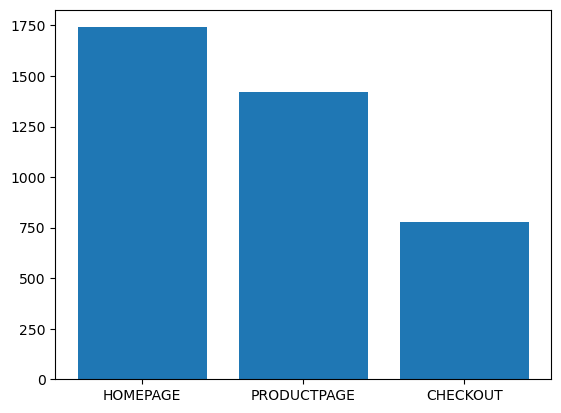

In [22]:
plt.bar(x=stage_frequency.index, height=stage_frequency.values)
plt.show()

In [23]:
date_2023 = customer_journey_df[(customer_journey_df.VisitDate>='2023-01-01') & (customer_journey_df.VisitDate<='2023-12-31')]
date_2024 = customer_journey_df[(customer_journey_df.VisitDate>='2024-01-01') & (customer_journey_df.VisitDate<='2024-12-31')]
date_2025 = customer_journey_df[(customer_journey_df.VisitDate>='2025-01-01') & (customer_journey_df.VisitDate<='2025-12-31')]

In [24]:
stg_frq_2023 =date_2023.Stage.value_counts()

In [25]:
stg_frq_2024= date_2024.Stage.value_counts()

In [26]:
stg_frq_2025=date_2025.Stage.value_counts()

<BarContainer object of 3 artists>

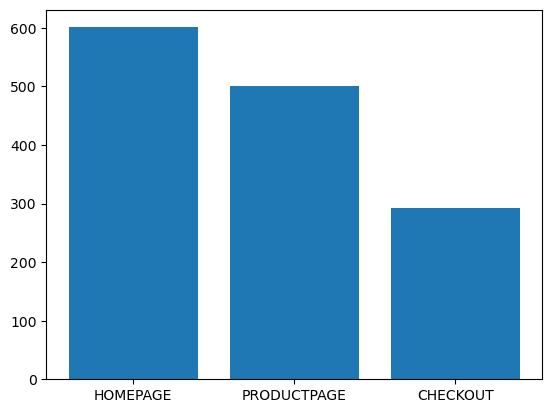

In [27]:
plt.bar(x=stg_frq_2023.index, height=stg_frq_2023.values)

<BarContainer object of 3 artists>

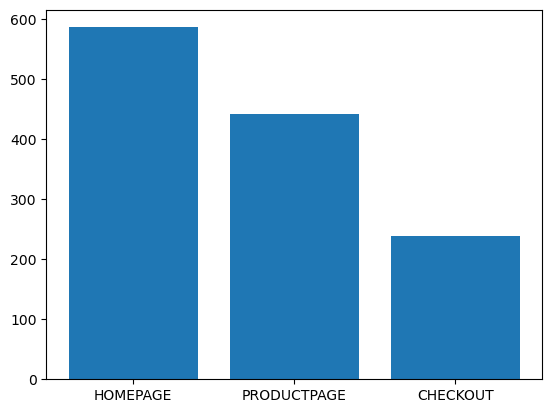

In [28]:
plt.bar(x=stg_frq_2024.index, height=stg_frq_2024.values)

<BarContainer object of 3 artists>

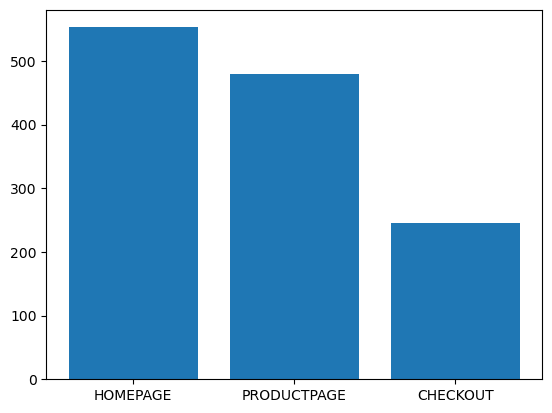

In [29]:
plt.bar(x=stg_frq_2025.index, height=stg_frq_2025.values)

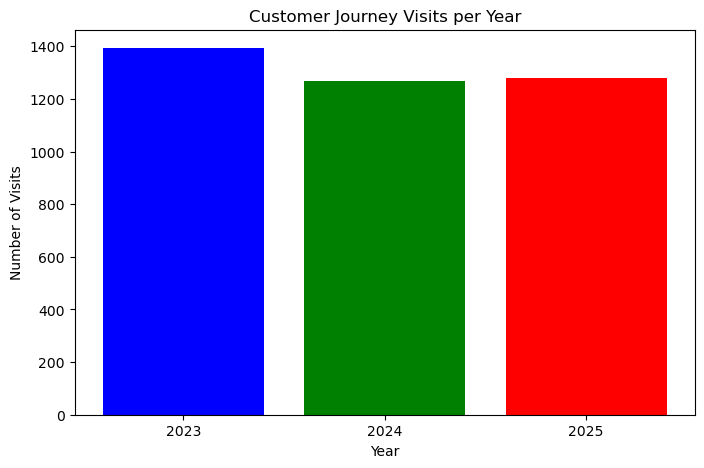

In [30]:
import matplotlib.pyplot as plt

# Filter the dataframe by year
date_2023 = customer_journey_df[(customer_journey_df.VisitDate >= '2023-01-01') & (customer_journey_df.VisitDate <= '2023-12-31')]
date_2024 = customer_journey_df[(customer_journey_df.VisitDate >= '2024-01-01') & (customer_journey_df.VisitDate <= '2024-12-31')]
date_2025 = customer_journey_df[(customer_journey_df.VisitDate >= '2025-01-01') & (customer_journey_df.VisitDate <= '2025-12-31')]

# Calculate the number of visits for each year
count_2023 = len(date_2023)
count_2024 = len(date_2024)
count_2025 = len(date_2025)

# Data for plotting
years = ['2023', '2024', '2025']
counts = [count_2023, count_2024, count_2025]
colors = ['blue', 'green', 'red']  # Choose a different color for each year

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(years, counts, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.title('Customer Journey Visits per Year')
plt.show()


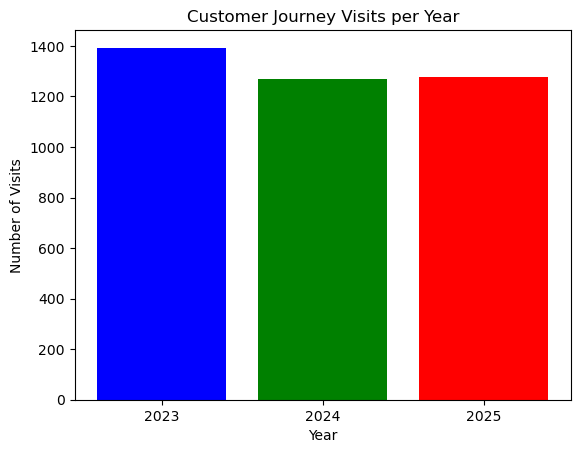

In [31]:
import matplotlib.pyplot as plt

# Filter data for each year using the between method for simplicity
data_2023 = customer_journey_df[customer_journey_df.VisitDate.between('2023-01-01', '2023-12-31')]
data_2024 = customer_journey_df[customer_journey_df.VisitDate.between('2024-01-01', '2024-12-31')]
data_2025 = customer_journey_df[customer_journey_df.VisitDate.between('2025-01-01', '2025-12-31')]

# Count visits for each year
count_2023 = len(data_2023)
count_2024 = len(data_2024)
count_2025 = len(data_2025)

# Prepare data for plotting
years = ['2023', '2024', '2025']
counts = [count_2023, count_2024, count_2025]
colors = ['blue', 'green', 'red']  # Different color for each bar

# Create a bar plot
plt.bar(years, counts, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.title('Customer Journey Visits per Year')
plt.show()


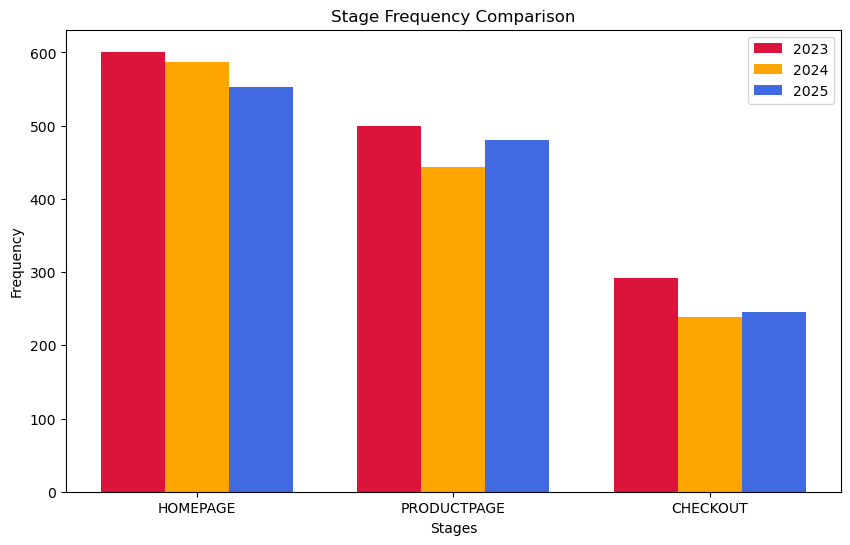

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (Replace with your actual data)
labels = stg_frq_2023.index  # Assuming all years have the same index
values_2023 = stg_frq_2023.values
values_2024 = stg_frq_2024.values
values_2025 = stg_frq_2025.values

x = np.arange(len(labels))  # X locations for the groups
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars side by side
bars1 = ax.bar(x - width, values_2023, width, label='2023', hatch='', color='crimson')
bars2 = ax.bar(x, values_2024, width, label='2024', color='orange')
bars3 = ax.bar(x + width, values_2025, width, label='2025', hatch='', color='royalblue')

# Labels, title, and legend
ax.set_xlabel("Stages")
ax.set_ylabel("Frequency")
ax.set_title("Stage Frequency Comparison")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

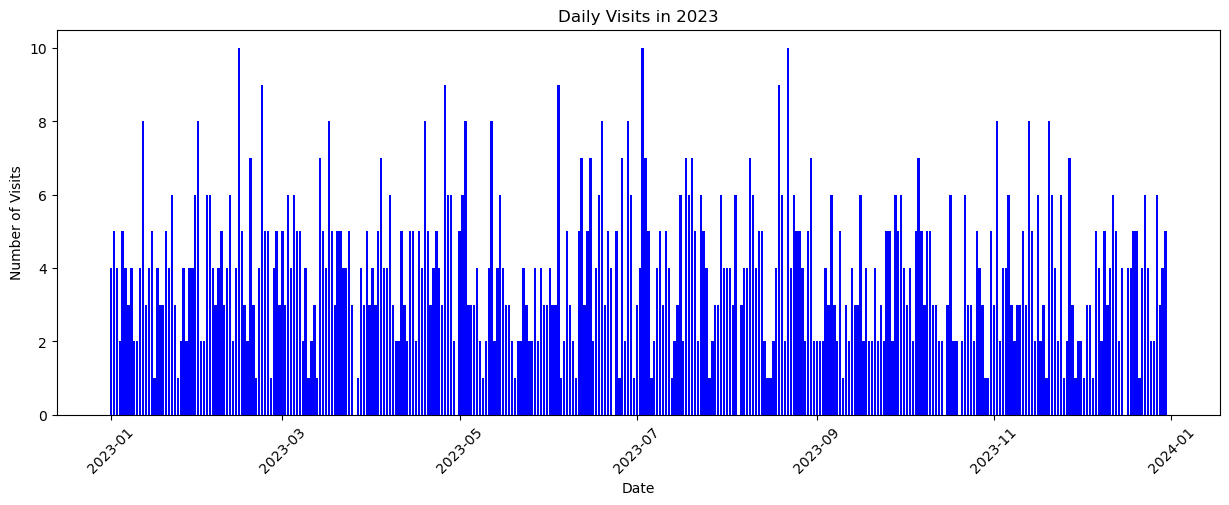

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure VisitDate is in datetime format
customer_journey_df['VisitDate'] = pd.to_datetime(customer_journey_df['VisitDate'])

# Filter data for 2023
data_2023 = customer_journey_df[(customer_journey_df.VisitDate >= '2023-01-01') & 
                                  (customer_journey_df.VisitDate <= '2023-12-31')]

# Group by each day and count visits
daily_counts = data_2023.groupby('VisitDate').size()

plt.figure(figsize=(15, 5))
plt.bar(daily_counts.index, daily_counts.values, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Daily Visits in 2023')
plt.xticks(rotation=45)
plt.show()


C:\Users\kk\AppData\Local\Temp\ipykernel_1716\3341739544.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Month'] = data_2023['VisitDate'].dt.month


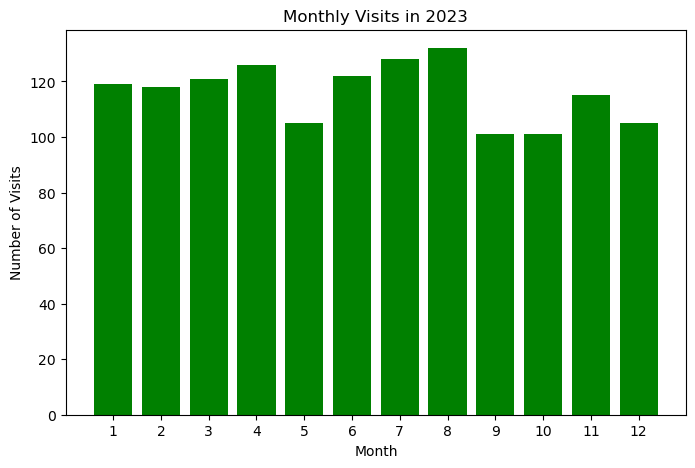

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure VisitDate is in datetime format
customer_journey_df['VisitDate'] = pd.to_datetime(customer_journey_df['VisitDate'])

# Filter data for 2023
data_2023 = customer_journey_df[(customer_journey_df.VisitDate >= '2023-01-01') & 
                                  (customer_journey_df.VisitDate <= '2023-12-31')]

# Create a new column for Month
data_2023['Month'] = data_2023['VisitDate'].dt.month

# Group by Month and count visits
monthly_counts = data_2023.groupby('Month').size()

plt.figure(figsize=(8, 5))
plt.bar(monthly_counts.index, monthly_counts.values, color='green')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.title('Monthly Visits in 2023')
plt.xticks(range(1, 13))
plt.show()


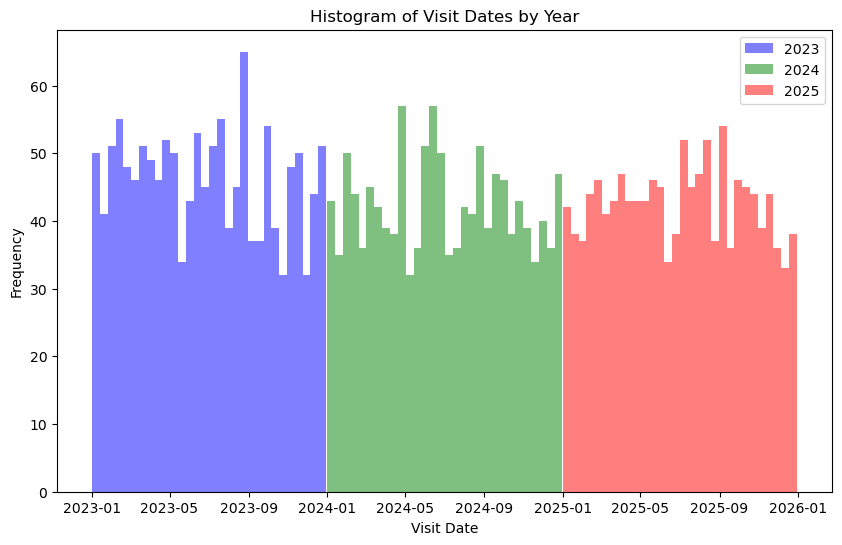

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the VisitDate column to datetime if it's not already
customer_journey_df['VisitDate'] = pd.to_datetime(customer_journey_df['VisitDate'])

# Filter data for each year
data_2023 = customer_journey_df[(customer_journey_df.VisitDate >= '2023-01-01') & 
                                  (customer_journey_df.VisitDate <= '2023-12-31')]
data_2024 = customer_journey_df[(customer_journey_df.VisitDate >= '2024-01-01') & 
                                  (customer_journey_df.VisitDate <= '2024-12-31')]
data_2025 = customer_journey_df[(customer_journey_df.VisitDate >= '2025-01-01') & 
                                  (customer_journey_df.VisitDate <= '2025-12-31')]

plt.figure(figsize=(10, 6))

# Overlay histograms with 30 bins each and alpha transparency so they can be seen together
plt.hist(data_2023['VisitDate'], bins=30, color='blue', alpha=0.5, label='2023')
plt.hist(data_2024['VisitDate'], bins=30, color='green', alpha=0.5, label='2024')
plt.hist(data_2025['VisitDate'], bins=30, color='red', alpha=0.5, label='2025')

plt.xlabel('Visit Date')
plt.ylabel('Frequency')
plt.title('Histogram of Visit Dates by Year')
plt.legend()
plt.show()
